In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the data into the pandas environment and identify some basic details of the dataset.

In [2]:
df=pd.read_csv("C:\\Users\\abcd\\Downloads\\employee.csv")

In [3]:
df

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
5,Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
6,James Authur,54.0,NaN,F,Operations,G3,53
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


In [4]:
df.shape

(9, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               9 non-null      object 
 1   age                7 non-null      float64
 2   income             7 non-null      float64
 3   gender             7 non-null      object 
 4   department         9 non-null      object 
 5   grade              9 non-null      object 
 6   performance_score  9 non-null      int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 632.0+ bytes


In [6]:
df.describe()

,age,income,performance_score
count,7.000000,7.000000,9.000000
mean,40.428571,52857.142857,610.666667
std,12.204605,26028.372797,235.671912
min,23.000000,16000.000000,53.000000
25%,31.000000,38500.000000,556.000000
50%,45.000000,52000.000000,674.000000
75%,49.500000,63500.000000,711.000000
max,54.000000,98000.000000,901.000000


# 2. Reset the index as "name"

In [7]:
df=df.set_index("name")
df

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
James Authur,54.0,NaN,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# 
3. Select rows for specific names Jack Morgan and Josh wills.

In [8]:
df_1=df.loc[["Jack Morgan"]]
df_2=df.loc[["Josh Wills"]]
df_name=pd.concat([df_1,df_2])
df_name

,age,income,gender,department,grade,performance_score
name,,,,,,
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Josh Wills,54.0,52000.0,F,Finance,G3,901


# 4. Select data for multiple values "Sales" and “Finance”.

In [9]:
df.loc[df['department'].isin(["Sales", "Finance"])]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# 5. Display employee who has more than 700 performance score

In [10]:
df.loc[(df["performance_score"]>700)]

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


#6. Display employee who has more than 500 and less than 700 performance score 

In [11]:
df.loc[(df["performance_score"]>500) & (df["performance_score"]<700)]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649


# 7. Check and handle missing values in the dataset.

In [12]:
df.isnull().sum()

age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [14]:
mean_age=df["age"].mean()
df["age"]=df["age"].fillna(mean_age)
median_income=df["income"].median()
df["income"]=df["income"].fillna(median_income)
mode_gender=df["gender"].mode()[0]
df["gender"]=df["gender"].fillna(mode_gender)

In [15]:
df

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.000000,52000.0,F,Operations,G3,723
S Kumar,40.428571,16000.0,F,Finance,G0,520
Jack Morgan,32.000000,35000.0,M,Finance,G2,674
Ying Chin,45.000000,65000.0,F,Sales,G3,556
Dheeraj Patel,30.000000,42000.0,F,Operations,G2,711
Satyam Sharma,40.428571,62000.0,F,Sales,G3,649
James Authur,54.000000,52000.0,F,Operations,G3,53
Josh Wills,54.000000,52000.0,F,Finance,G3,901
Leo Duck,23.000000,98000.0,M,Sales,G4,709


In [16]:
df.isna().sum()

age                  0
income               0
gender               0
department           0
grade                0
performance_score    0
dtype: int64

# 8. Check the outliers and handle outliers in performance score using Percentiles.

C:\Users\abcd\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Plot of performance score'}, xlabel='performance_score'>

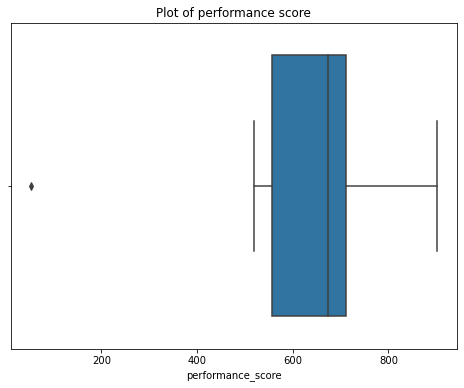

In [17]:
plt.figure(figsize=(8,6))

plt.title("Plot of performance score")
sns.boxplot(df["performance_score"])

In [18]:
Q1=np.percentile(df["performance_score"],25)
print("Q1 =",Q1)
Q3=np.percentile(df["performance_score"],75)
print("Q3 =",Q3)
IQR=Q3-Q1
print("IQR =",IQR)

Q1 = 556.0
Q3 = 711.0
IQR = 155.0


In [19]:
upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR
print("upper limit=",upper_limit)
print("lower limit=",lower_limit)

upper limit= 943.5
lower limit= 323.5


In [20]:
outlier_below=df.loc[(df["performance_score"]>upper_limit)]
outlier_abv=df.loc[(df["performance_score"]<lower_limit)]
print("The outliers are",outlier_below,outlier_abv)

The outliers are Empty DataFrame
Columns: [age, income, gender, department, grade, performance_score]
Index: []                age   income gender  department grade  performance_score
name                                                                   
James Authur  54.0  52000.0      F  Operations    G3                 53


In [21]:
#Dropping the outlier value.
new_df=df.drop(['James Authur'])

In [22]:
new_df

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.000000,52000.0,F,Operations,G3,723
S Kumar,40.428571,16000.0,F,Finance,G0,520
Jack Morgan,32.000000,35000.0,M,Finance,G2,674
Ying Chin,45.000000,65000.0,F,Sales,G3,556
Dheeraj Patel,30.000000,42000.0,F,Operations,G2,711
Satyam Sharma,40.428571,62000.0,F,Sales,G3,649
Josh Wills,54.000000,52000.0,F,Finance,G3,901
Leo Duck,23.000000,98000.0,M,Sales,G4,709


# 9. Check the gender column and do Dummy encoding.

In [23]:
pd.get_dummies(new_df,columns=["gender"])

,age,income,department,grade,performance_score,gender_F,gender_M
name,,,,,,,
Allen Smith,45.000000,52000.0,Operations,G3,723,1,0
S Kumar,40.428571,16000.0,Finance,G0,520,1,0
Jack Morgan,32.000000,35000.0,Finance,G2,674,0,1
Ying Chin,45.000000,65000.0,Sales,G3,556,1,0
Dheeraj Patel,30.000000,42000.0,Operations,G2,711,1,0
Satyam Sharma,40.428571,62000.0,Sales,G3,649,1,0
Josh Wills,54.000000,52000.0,Finance,G3,901,1,0
Leo Duck,23.000000,98000.0,Sales,G4,709,0,1


# 10.Do the standard scaling on the feature performance score.

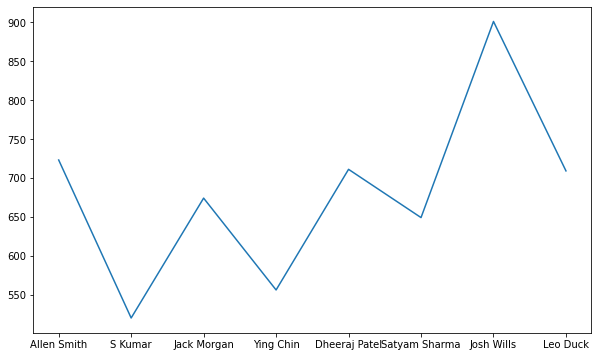

In [24]:
plt.figure(figsize=(10,6))
plt.plot(new_df["performance_score"])

In [25]:
#Inorder to scale down the values we use scaling 
from sklearn.preprocessing import StandardScaler
scaled=StandardScaler()
column=['performance_score']
feature=new_df[column]
scaler=scaled.fit(feature.values)
feature=scaler.transform(feature.values)
new_df[column]=feature
new_df

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.000000,52000.0,F,Operations,G3,0.392262
S Kumar,40.428571,16000.0,F,Finance,G0,-1.475872
Jack Morgan,32.000000,35000.0,M,Finance,G2,-0.058667
Ying Chin,45.000000,65000.0,F,Sales,G3,-1.144578
Dheeraj Patel,30.000000,42000.0,F,Operations,G2,0.281831
Satyam Sharma,40.428571,62000.0,F,Sales,G3,-0.288733
Josh Wills,54.000000,52000.0,F,Finance,G3,2.030331
Leo Duck,23.000000,98000.0,M,Sales,G4,0.263425


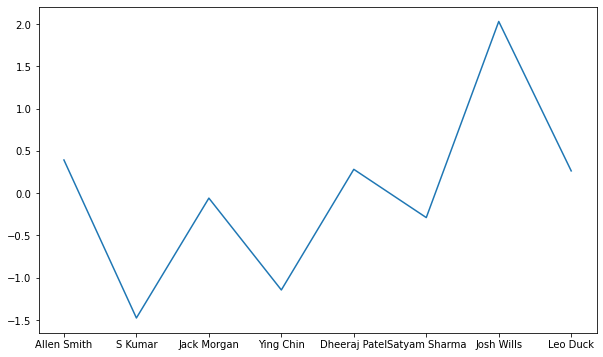

In [26]:
plt.figure(figsize=(10,6))
plt.plot(new_df["performance_score"])